In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
import numpy as np

In [19]:
test_df = pd.read_csv('../data/BikeRentalDaily_test.csv', delimiter=';')
train_df = pd.read_csv('../data/BikeRentalDaily_train.csv', delimiter=';')

train_df

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,leaflets,price reduction,casual,registered,cnt
0,154,03.06.2011,2.0,0,6,0,5,1,1,24.8000,0.587133,53.12505,0.253121,991,0,898,4414,5312
1,685,15.11.2012,4.0,1,11,0,4,1,2,12.8667,0.324492,93.06255,0.152987,601,0,320,5125,5445
2,368,03.01.2012,1.0,1,1,0,2,1,1,6.0000,0.126275,66.18750,0.365671,549,0,89,2147,2236
3,472,16.04.2012,2.0,1,4,1,1,0,1,26.5667,0.614925,84.25005,0.284829,740,0,1198,5172,6370
4,442,17.03.2012,1.0,1,3,0,-1,0,2,20.5667,0.505046,113.37495,0.110704,773,1,3155,4681,7836
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
595,78,19.03.2011,1.0,0,3,0,6,0,1,18.9000,0.466525,56.87505,0.368167,1022,1,1424,1693,3117
596,81,22.03.2011,NaN,0,3,0,2,1,1,17.6667,0.440642,93.68745,0.225750,551,0,460,2243,2703
597,377,12.01.2012,1.0,1,1,0,4,1,2,15.3000,0.381938,120.43755,0.180967,520,0,269,3828,4097
598,299,26.10.2011,4.0,0,10,0,3,1,2,19.3667,0.472846,108.06255,0.148642,605,0,404,3490,3894


Train Data

In [20]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   instant          600 non-null    int64  
 1   dteday           600 non-null    object 
 2   season           538 non-null    float64
 3   yr               600 non-null    int64  
 4   mnth             600 non-null    int64  
 5   holiday          600 non-null    int64  
 6   weekday          600 non-null    int64  
 7   workingday       600 non-null    int64  
 8   weathersit       600 non-null    int64  
 9   temp             600 non-null    float64
 10  atemp            600 non-null    float64
 11  hum              566 non-null    float64
 12  windspeed        600 non-null    float64
 13  leaflets         600 non-null    int64  
 14  price reduction  600 non-null    int64  
 15  casual           600 non-null    int64  
 16  registered       600 non-null    int64  
 17  cnt             

In [21]:
sorted_df = train_df.sort_values(by=['instant'])

train_df = sorted_df.set_index('instant')

train_df

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,leaflets,price reduction,casual,registered,cnt
instant,,,,,,,,,,,,,,,,,
1,01.01.2011,NaN,0,1,0,6,0,2,13.7667,0.363625,120.87495,0.160446,755,0,331,654,985
2,02.01.2011,1.0,0,1,0,0,0,2,14.5391,0.353739,104.41305,0.248539,837,1,131,670,801
3,03.01.2011,NaN,0,1,0,1,1,1,7.8546,0.189405,65.59095,0.248309,829,0,120,1229,1349
4,04.01.2011,1.0,0,1,0,2,1,1,8.0000,0.212122,88.56525,0.160296,734,0,108,1454,1562
5,05.01.2011,1.0,0,1,0,3,1,1,9.0783,0.229270,65.54355,0.186900,745,0,82,1518,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,26.12.2012,1.0,1,12,0,3,1,3,9.7333,0.220333,123.49995,0.316546,701,0,9,432,441
727,27.12.2012,1.0,1,12,0,4,1,2,10.1667,0.226642,97.93755,0.350133,561,0,247,1867,2114
728,28.12.2012,1.0,1,12,0,5,1,2,10.1333,0.255046,88.50000,0.155471,562,0,644,2451,3095


In [22]:
#hum has to many outliers
print("Hum Outliers: ",len(train_df[train_df["hum"] > 100]))
print("Windspeed Outliers: ",len(train_df[train_df["windspeed"] < 0]))

Hum Outliers:  229
Windspeed Outliers:  4


In [23]:
train_df = train_df.drop('hum', axis=1)
train_df.head()

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,windspeed,leaflets,price reduction,casual,registered,cnt
instant,,,,,,,,,,,,,,,,
1,01.01.2011,NaN,0,1,0,6,0,2,13.7667,0.363625,0.160446,755,0,331,654,985
2,02.01.2011,1.0,0,1,0,0,0,2,14.5391,0.353739,0.248539,837,1,131,670,801
3,03.01.2011,NaN,0,1,0,1,1,1,7.8546,0.189405,0.248309,829,0,120,1229,1349
4,04.01.2011,1.0,0,1,0,2,1,1,8.0000,0.212122,0.160296,734,0,108,1454,1562
5,05.01.2011,1.0,0,1,0,3,1,1,9.0783,0.229270,0.186900,745,0,82,1518,1600


In [24]:
#replacing outliers of windspeed with the median 

for i in train_df['windspeed']:
    if i < 0:
        train_df['windspeed'] = train_df['windspeed'].replace(i, train_df['windspeed'].median())

#replace missing values of season via dteday
for i in train_df['season']:
    if np.isnan(i):
        for j in train_df['dteday']:
            if j > '20.12.' and  j < '21.03.':
                train_df['season'] = train_df['season'].replace(i, 1)
            if j > '20.03.' and  j <'21.06.':
                train_df['season'] = train_df['season'].replace(i, 2)
            if j > '20.06.' and  j <'21.09.':
                train_df['season'] = train_df['season'].replace(i, 3)
            if j > '20.09.' and  j <'21.12.':
                train_df['season'] = train_df['season'].replace(i, 4)

In [25]:
train_df.head()

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,windspeed,leaflets,price reduction,casual,registered,cnt
instant,,,,,,,,,,,,,,,,
1,01.01.2011,1.0,0,1,0,6,0,2,13.7667,0.363625,0.160446,755,0,331,654,985
2,02.01.2011,1.0,0,1,0,0,0,2,14.5391,0.353739,0.248539,837,1,131,670,801
3,03.01.2011,1.0,0,1,0,1,1,1,7.8546,0.189405,0.248309,829,0,120,1229,1349
4,04.01.2011,1.0,0,1,0,2,1,1,8.0000,0.212122,0.160296,734,0,108,1454,1562
5,05.01.2011,1.0,0,1,0,3,1,1,9.0783,0.229270,0.186900,745,0,82,1518,1600


In [26]:
#replace the missing values via dteday, new order
train_df['weekday'] = pd.to_datetime(train_df['dteday'], format="%d.%M.%Y").dt.dayofweek

train_df['weekday']

instant
1      5
2      6
3      0
4      1
5      2
      ..
726    3
727    4
728    5
729    6
731    1
Name: weekday, Length: 600, dtype: int32

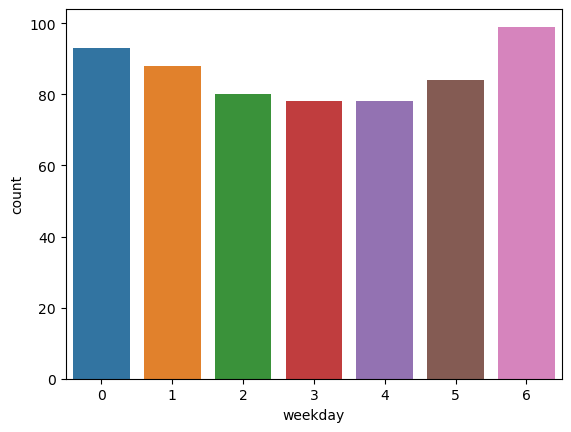

In [27]:
sns.countplot(x='weekday', data=train_df)
plt.show()

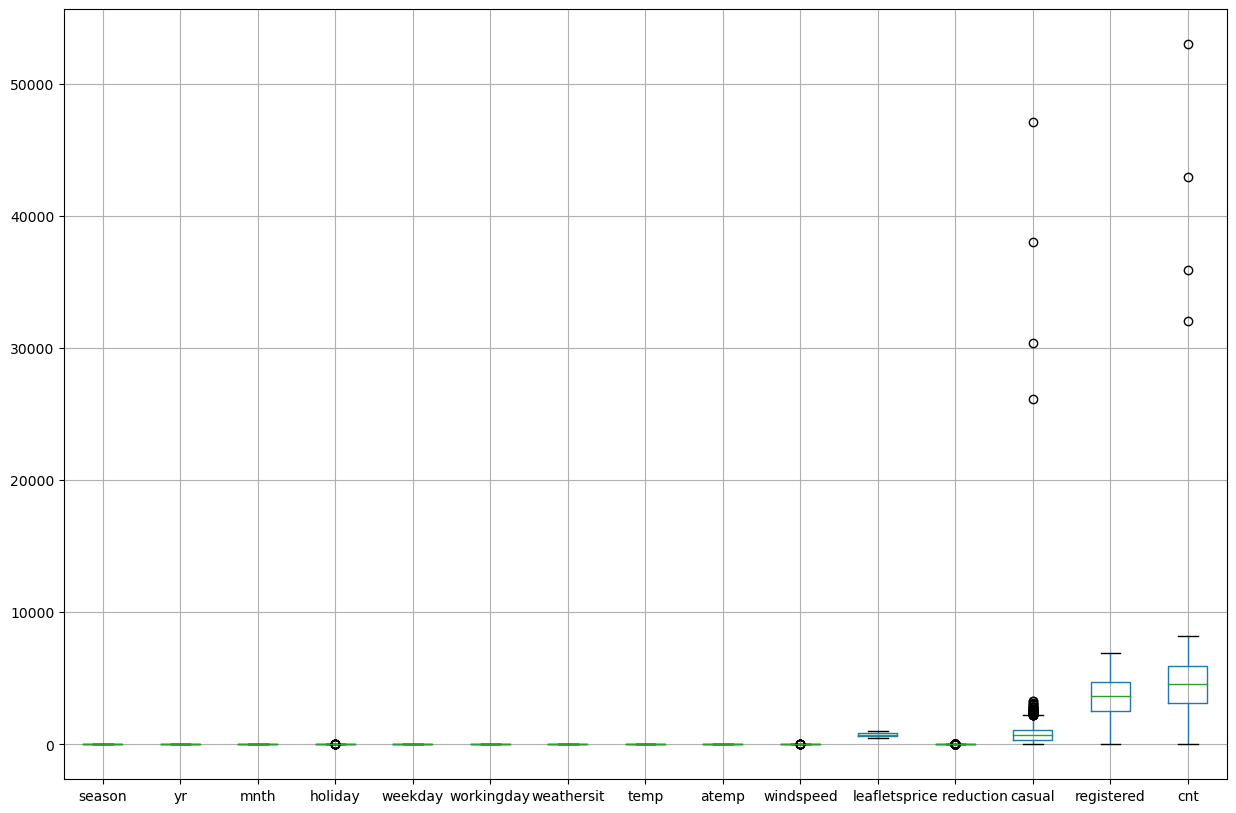

In [31]:
boxplot = train_df.boxplot(figsize=(15, 10))
plt.show()

In [32]:
#filter the df based on the quantile (still have to figure out, which quantile percentage is the right one)
q = train_df["casual"].quantile(0.95)

#q = train_df.iloc[:, 2:].quantile(0.9)
print(q)
handeled_df = train_df[train_df['casual'] < q]

2455.999999999998


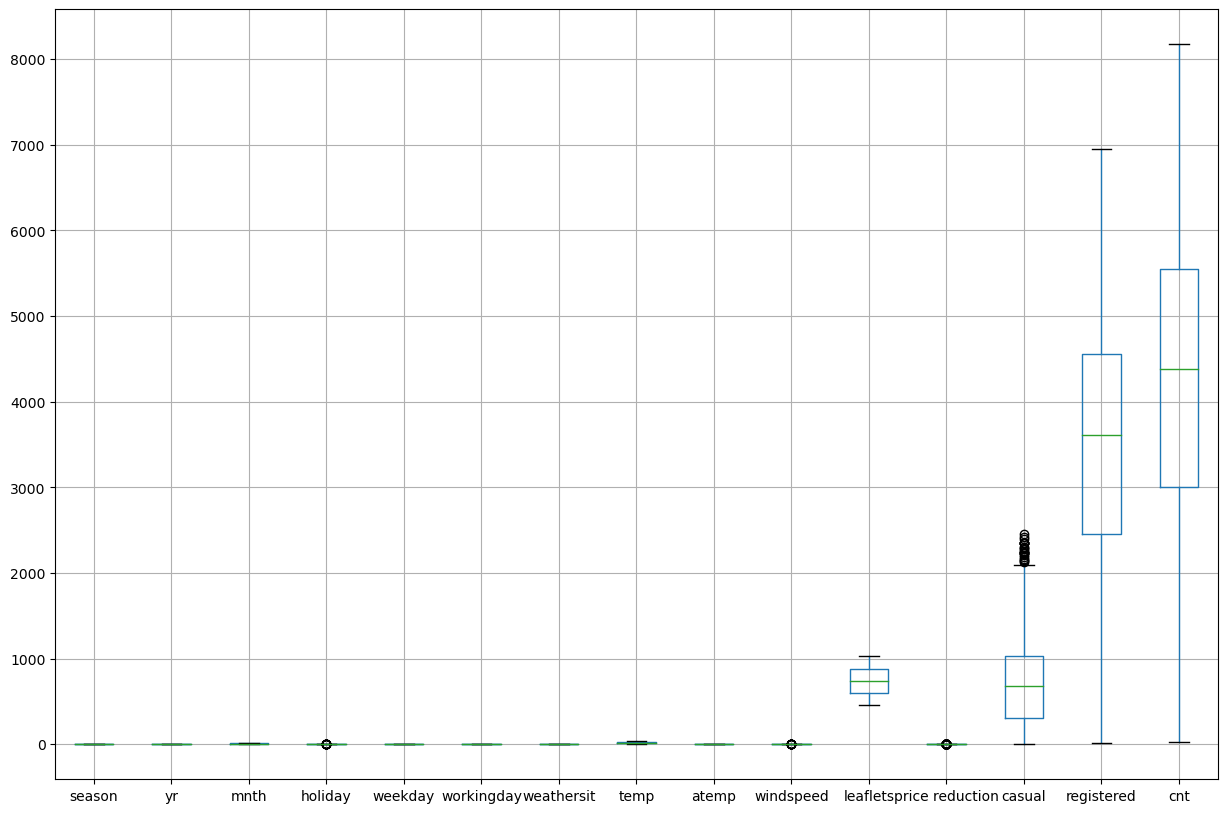

In [33]:
boxplot = handeled_df.boxplot(figsize=(15, 10))
plt.show()

In [41]:
q = handeled_df["casual"].quantile(0.959)

#q = train_df.iloc[:, 2:].quantile(0.9)
print(q)
handeled_df_2 = handeled_df[handeled_df['casual'] < q]

2065.3249999999953


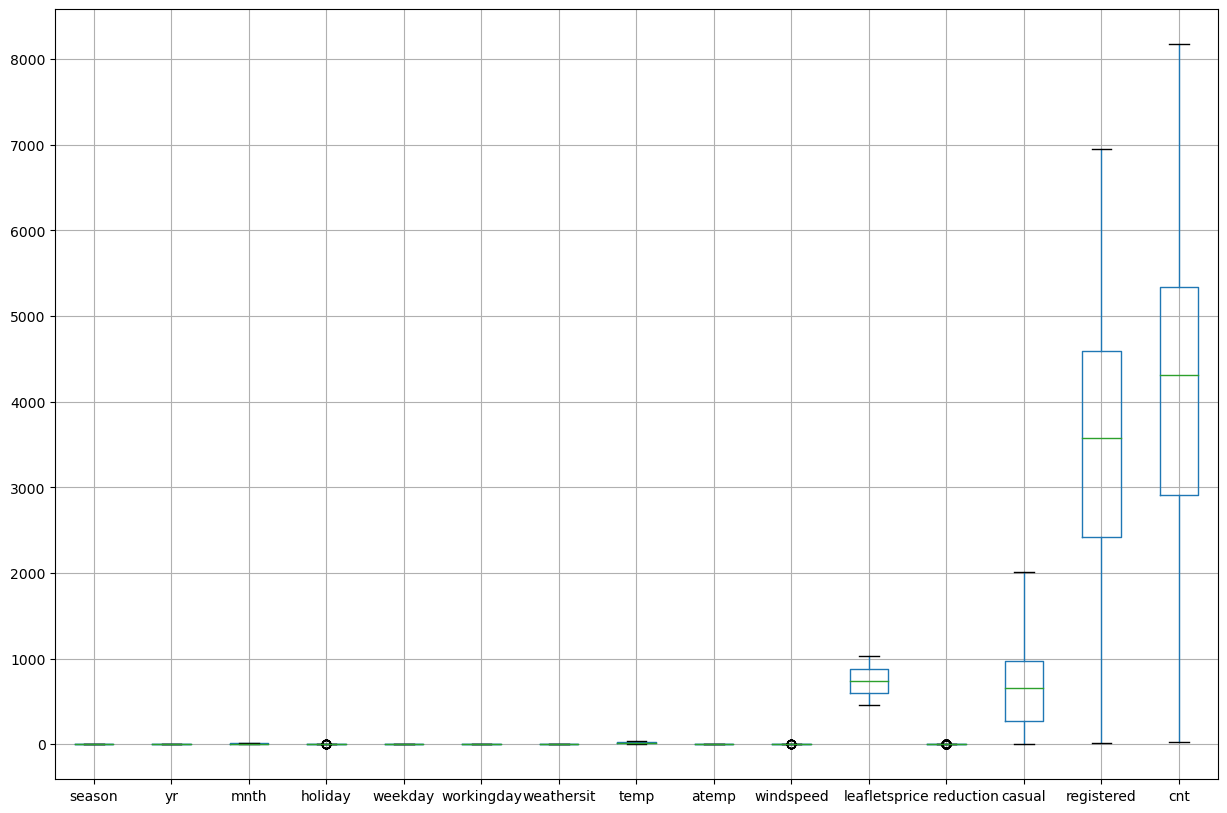

In [42]:
boxplot = handeled_df_2.boxplot(figsize=(15, 10))
plt.show()

In [45]:
feature_handeled_df = handeled_df.iloc[:, :13]
feature_handeled_df.head()

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,windspeed,leaflets,price reduction
instant,,,,,,,,,,,,,
1,01.01.2011,1.0,0,1,0,5,0,2,13.7667,0.363625,0.160446,755,0
2,02.01.2011,1.0,0,1,0,6,0,2,14.5391,0.353739,0.248539,837,1
3,03.01.2011,1.0,0,1,0,0,1,1,7.8546,0.189405,0.248309,829,0
4,04.01.2011,1.0,0,1,0,1,1,1,8.0000,0.212122,0.160296,734,0
5,05.01.2011,1.0,0,1,0,2,1,1,9.0783,0.229270,0.186900,745,0


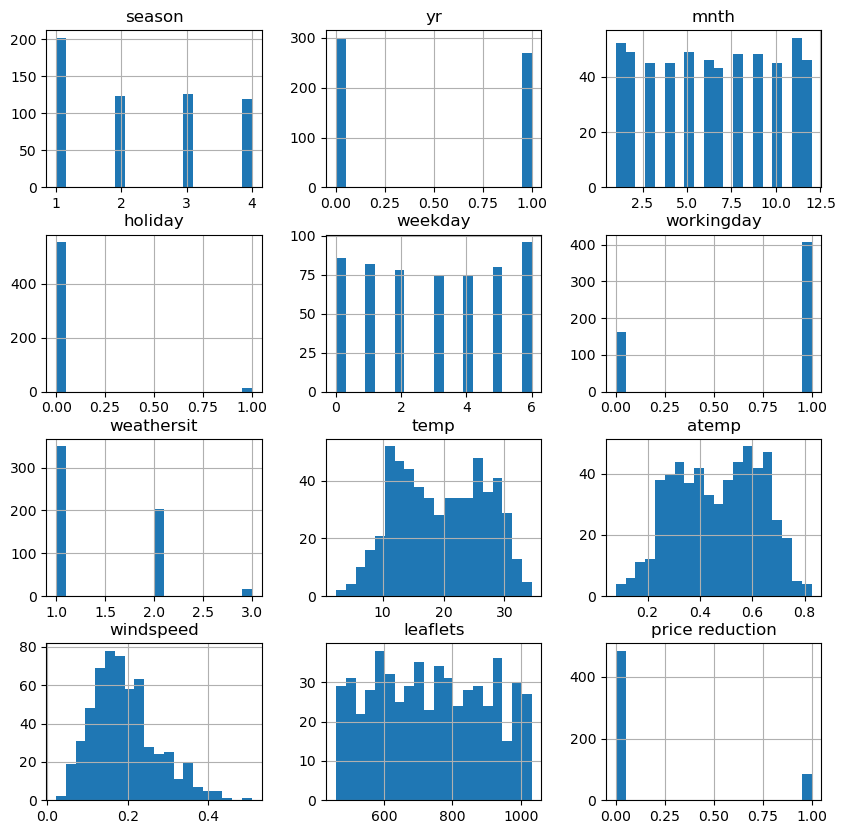

In [46]:
# histogram plot
hist = feature_handeled_df.hist(bins=20,figsize=(10, 10))
# windspeed seems to be skewed, so we will normalize this feature

C:\Users\ruhmt\AppData\Local\Temp\ipykernel_7228\331852683.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  handeled_df_2['windspeed'] = feature_handeled_df['windspeed ptransformed']


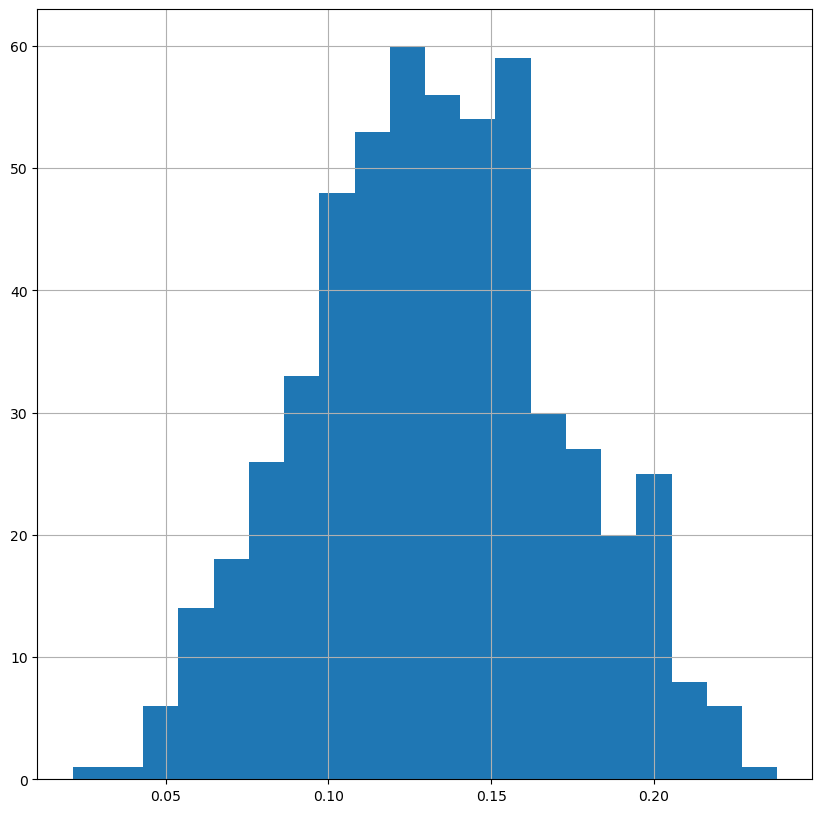

In [48]:
from sklearn.preprocessing import PowerTransformer
pt = PowerTransformer(standardize=False)
trans_temp= pt.fit_transform(np.array(feature_handeled_df['windspeed'].array.reshape(-1, 1)))


feature_handeled_df['windspeed ptransformed']=trans_temp
handeled_df_2['windspeed'] = feature_handeled_df['windspeed ptransformed']
hist = handeled_df_2['windspeed'].hist(bins=20,figsize=(10, 10))

In [49]:
handeled_df_2

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,windspeed,leaflets,price reduction,casual,registered,cnt
instant,,,,,,,,,,,,,,,,
1,01.01.2011,1.0,0,1,0,5,0,2,13.7667,0.363625,0.120422,755,0,331,654,985
2,02.01.2011,1.0,0,1,0,6,0,2,14.5391,0.353739,0.162833,837,1,131,670,801
3,03.01.2011,1.0,0,1,0,0,1,1,7.8546,0.189405,0.162737,829,0,120,1229,1349
4,04.01.2011,1.0,0,1,0,1,1,1,8.0000,0.212122,0.120339,734,0,108,1454,1562
5,05.01.2011,1.0,0,1,0,2,1,1,9.0783,0.229270,0.134476,745,0,82,1518,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,26.12.2012,1.0,1,12,0,3,1,3,9.7333,0.220333,0.188325,701,0,9,432,441
727,27.12.2012,1.0,1,12,0,4,1,2,10.1667,0.226642,0.199105,561,0,247,1867,2114
728,28.12.2012,1.0,1,12,0,5,1,2,10.1333,0.255046,0.117636,562,0,644,2451,3095


Test Data

In [50]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 132 entries, 0 to 131
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   instant          132 non-null    int64  
 1   dteday           132 non-null    object 
 2   season           121 non-null    float64
 3   yr               132 non-null    int64  
 4   mnth             132 non-null    int64  
 5   holiday          132 non-null    int64  
 6   weekday          132 non-null    int64  
 7   workingday       132 non-null    int64  
 8   weathersit       132 non-null    int64  
 9   temp             132 non-null    float64
 10  atemp            132 non-null    float64
 11  hum              126 non-null    float64
 12  windspeed        132 non-null    float64
 13  leaflets         132 non-null    int64  
 14  price reduction  132 non-null    int64  
 15  casual           132 non-null    int64  
 16  registered       132 non-null    int64  
 17  cnt             

In [51]:
sorted_df = test_df.sort_values(by=['instant'])


test_df = sorted_df.set_index('instant')

test_df

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,leaflets,price reduction,casual,registered,cnt
instant,,,,,,,,,,,,,,,,,
7,07.01.2011,1.0,0,1,0,5,1,2,7.8609,0.208839,74.80440,0.168726,977,0,148,1362,1510
11,11.01.2011,1.0,0,1,0,2,1,2,6.7636,0.191464,102.95460,0.122132,1028,0,43,1220,1263
14,14.01.2011,1.0,0,1,0,5,1,1,6.4348,0.188413,80.67390,0.126548,481,0,54,1367,1421
16,16.01.2011,1.0,0,1,0,0,0,1,9.2667,0.234217,72.56250,0.188433,493,0,251,953,1204
18,18.01.2011,1.0,0,1,0,2,1,2,8.6667,0.232333,129.25005,0.146775,989,0,9,674,683
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
709,09.12.2012,4.0,1,12,0,0,0,2,15.3667,0.390146,135.81255,0.157975,869,0,441,2787,3228
711,11.12.2012,4.0,1,12,0,2,1,2,14.1333,0.338363,89.50005,0.296037,711,0,282,5219,5501
714,14.12.2012,4.0,1,12,0,5,1,1,11.2667,0.294192,96.43755,0.131229,528,0,429,5182,5611


In [52]:
#Again, alot of hum values are over 100, so we have some outliers here
print(len(test_df[test_df["hum"] > 100]))
#Because of the amount of outliers, we delete hum again 
test_df = test_df.drop('hum', axis=1)

45


In [ ]:
for i in test_df['season']:
    if np.isnan(i):
        for j in test_df['dteday']:
            if j > '20.12.' and  j < '21.03.':
                test_df['season'] = test_df['season'].replace(i, 1)
            if j > '20.03.' and  j <'21.06.':
                test_df['season'] = test_df['season'].replace(i, 2)
            if j > '20.06.' and  j <'21.09.':
                test_df['season'] = test_df['season'].replace(i, 3)
            if j > '20.09.' and  j <'21.12.':
                test_df['season'] = test_df['season'].replace(i, 4)

test_df['weekday'] = pd.to_datetime(test_df['dteday'], format="%d.%M.%Y").dt.dayofweek


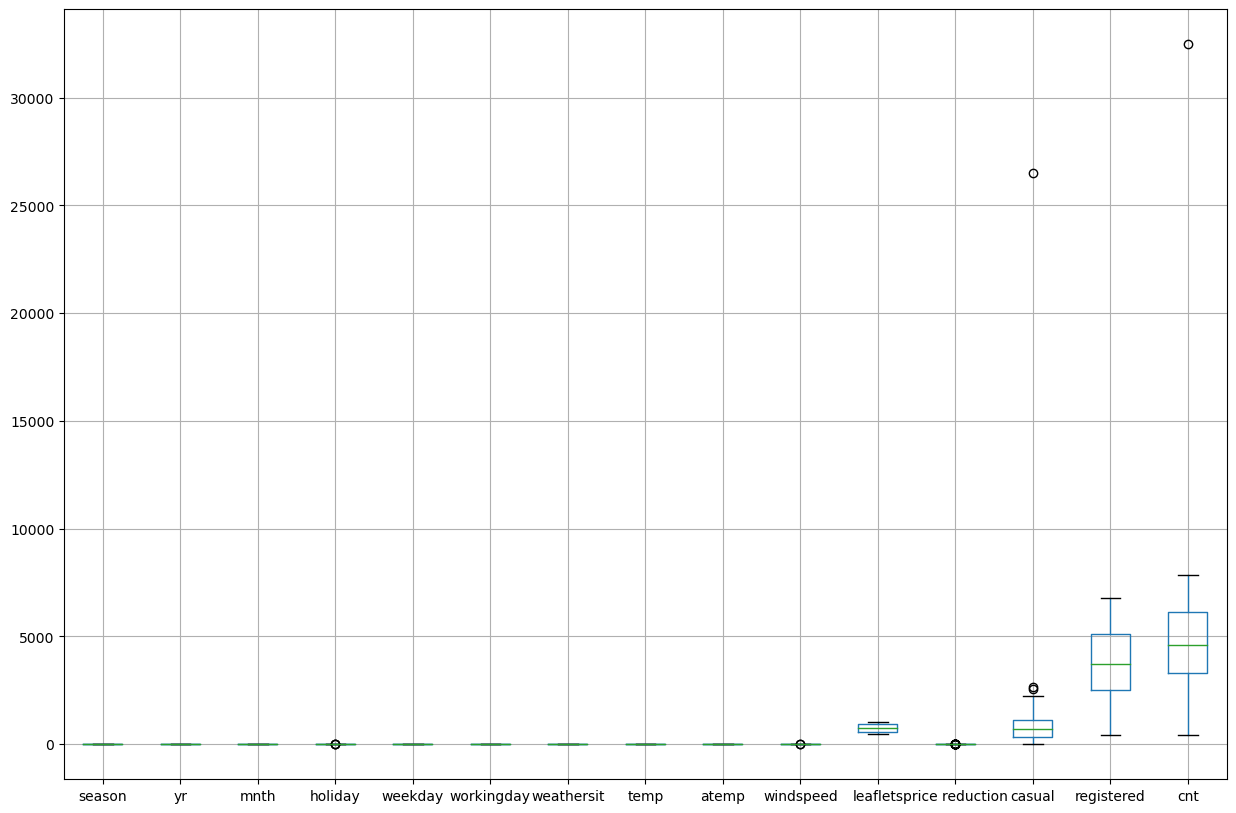

In [53]:
boxplot = test_df.boxplot(figsize=(15, 10))
plt.show()

In [54]:
feature_test_df = test_df.iloc[:, :13]
feature_test_df.head()

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,windspeed,leaflets,price reduction
instant,,,,,,,,,,,,,
7,07.01.2011,1.0,0,1,0,5,1,2,7.8609,0.208839,0.168726,977,0
11,11.01.2011,1.0,0,1,0,2,1,2,6.7636,0.191464,0.122132,1028,0
14,14.01.2011,1.0,0,1,0,5,1,1,6.4348,0.188413,0.126548,481,0
16,16.01.2011,1.0,0,1,0,0,0,1,9.2667,0.234217,0.188433,493,0
18,18.01.2011,1.0,0,1,0,2,1,2,8.6667,0.232333,0.146775,989,0


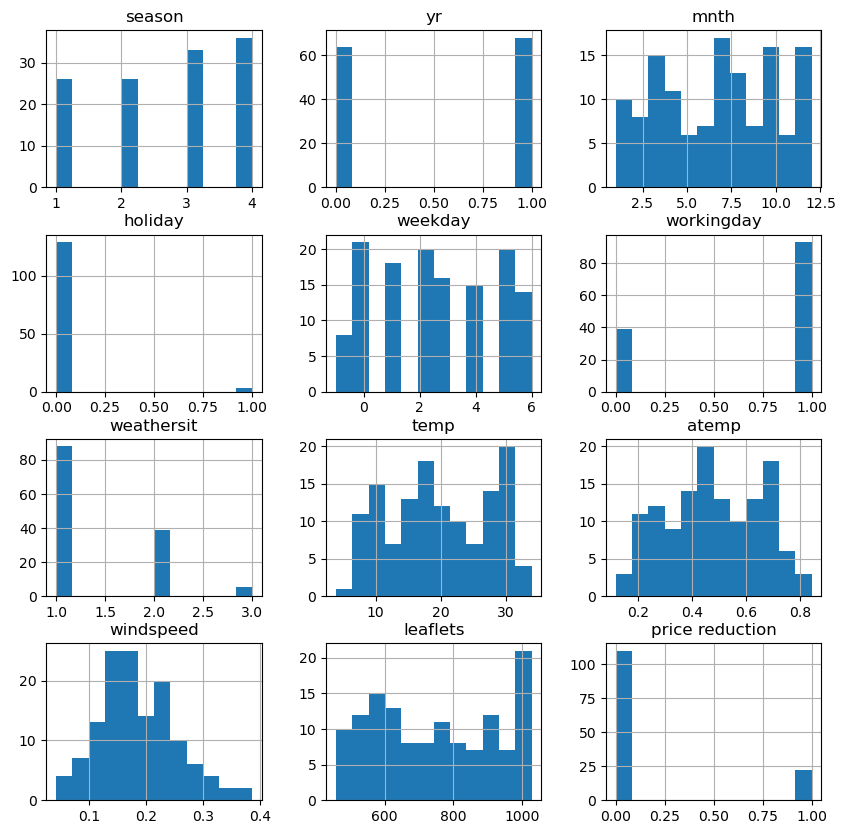

In [55]:
hist = feature_test_df.hist(bins=12,figsize=(10, 10))

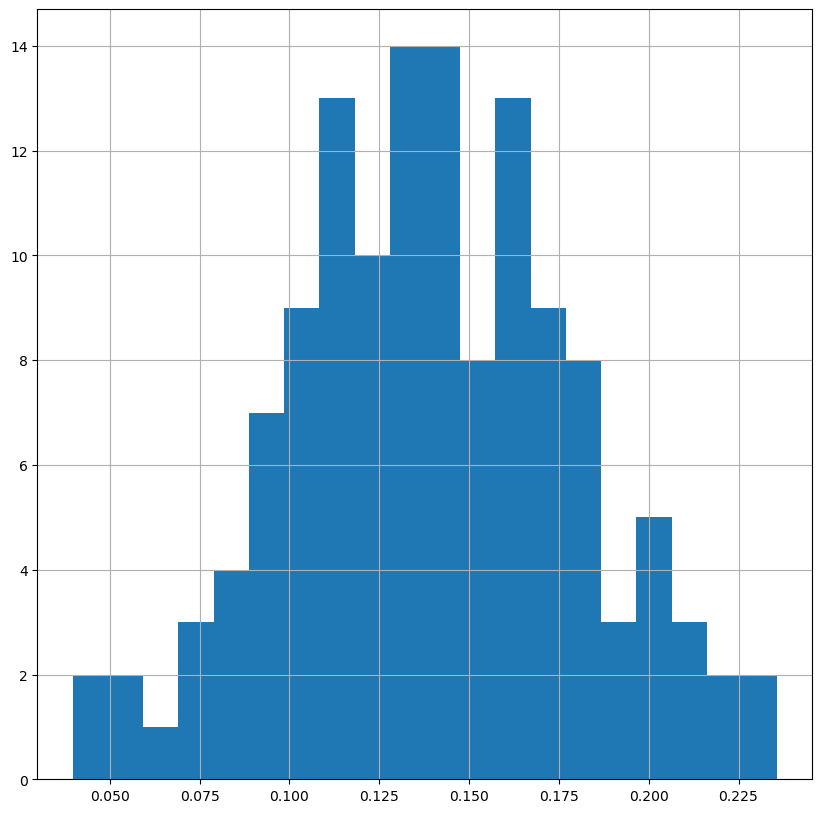

In [56]:
trans_windspeed= pt.fit_transform(np.array(feature_test_df['windspeed'].array.reshape(-1, 1)))

feature_test_df['windspeed ptransformed']=trans_windspeed
test_df['windspeed'] = feature_test_df['windspeed ptransformed']
hist = test_df['windspeed'].hist(bins=20,figsize=(10, 10))

In [57]:
test_df

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,windspeed,leaflets,price reduction,casual,registered,cnt
instant,,,,,,,,,,,,,,,,
7,07.01.2011,1.0,0,1,0,5,1,2,7.8609,0.208839,0.132868,977,0,148,1362,1510
11,11.01.2011,1.0,0,1,0,2,1,2,6.7636,0.191464,0.102294,1028,0,43,1220,1263
14,14.01.2011,1.0,0,1,0,5,1,1,6.4348,0.188413,0.105361,481,0,54,1367,1421
16,16.01.2011,1.0,0,1,0,0,0,1,9.2667,0.234217,0.144692,493,0,251,953,1204
18,18.01.2011,1.0,0,1,0,2,1,2,8.6667,0.232333,0.118945,989,0,9,674,683
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
709,09.12.2012,4.0,1,12,0,0,0,2,15.3667,0.390146,0.126151,869,0,441,2787,3228
711,11.12.2012,4.0,1,12,0,2,1,2,14.1333,0.338363,0.199726,711,0,282,5219,5501
714,14.12.2012,4.0,1,12,0,5,1,1,11.2667,0.294192,0.108572,528,0,429,5182,5611
